In [1]:
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers.core import Dense, Activation, Dropout

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
def write_preds(preds, filename):
    df = pd.DataFrame({"ImageId": list(range(1,len(preds)+1)), "Label": preds})
    df.to_csv(filename + '.csv', index=False, header=True)

In [3]:
def normalize_image(X):
    return X/255

In [17]:
def create_model():
    # Here's a Deep Dumb MLP (DDMLP)
    model = Sequential()
    model.add(Dense(128, input_dim=input_dim, kernel_initializer='lecun_uniform'))
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.5))
    model.add(Dense(128, input_dim=128, kernel_initializer='lecun_uniform'))
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.5))
    model.add(Dense(nb_classes, input_dim=128, kernel_initializer='lecun_uniform'))
    model.add(Activation('sigmoid'))

    # we'll use MSE (mean squared error) for the loss, and RMSprop as the optimizer
    model.compile(loss='mse', optimizer='rmsprop')


    return model

In [7]:
# Read data
train = pd.read_csv('data/train.csv')
labels = train.iloc[:,0].values.astype('int32')
X_train = (train.iloc[:,1:].values).astype('float32')
X_test = (pd.read_csv('data/test.csv').values).astype('float32')

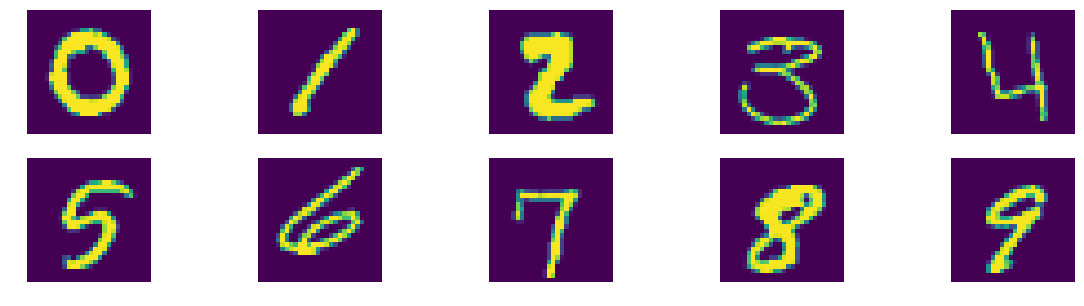

In [9]:
plt.figure(figsize=(20,5))
for i in range(0, 10):
    ind = np.where(labels==i)[0][0]
    digit = X_train[ind,:].reshape(28,28)
    plt.subplot(2,5,i+1)
    plt.imshow(digit)
    plt.axis('off')

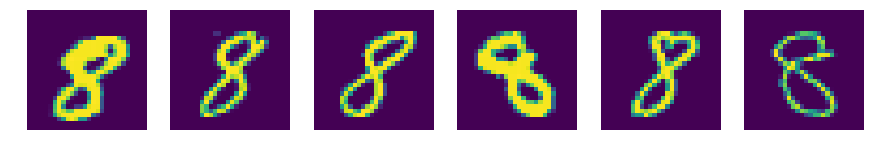

In [10]:
plt.figure(figsize=(15,5))
for i in range(0, 6):
    ind = np.where(labels==8)[0][i]
    digit = X_train[ind,:].reshape(28,28)
    plt.subplot(1,6,i+1)
    plt.imshow(digit)
    plt.axis('off')

In [11]:
# convert list of labels to binary class matrix
y_train = np_utils.to_categorical(labels) 

X_train= normalize_image(X_train)
X_test= normalize_image(X_test)

input_dim = X_train.shape[1]
nb_classes = y_train.shape[1]

In [18]:
model = create_model()

In [ ]:
print("Training...")
model.fit(X_train, y_train, nb_epoch=15, batch_size=16, verbose=1)

Training...
Epoch 1/15
42000/42000 [==============================] - 10s - loss: 0.0392    
Epoch 2/15
28048/42000 [===================>..........] - ETA: 3s - loss: 0.0187

In [ ]:
print("Generating test predictions...")
preds = model.predict_classes(X_test, verbose=0)
write_preds(preds, "keras-mlp")